# Simple Additive Weighting (SAW) Method in Multi-Criteria Decision Making


## Introduction


Simple Additive Weighting (SAW) is one of the most widely used Multi-Criteria Decision Making (MCDM) methods. It's also known as the **Weighted Sum Model (WSM)** or **Linear Additive Model**. 


SAW is particularly useful when you need to:

- Evaluate alternatives based on multiple criteria

- Handle both quantitative and qualitative data

- Make decisions with clear, interpretable results



### How SAW Works



1. **Normalization**: Convert all criteria to a common scale (0-1)

2. **Weighting**: Apply importance weights to each criterion

3. **Aggregation**: Sum the weighted normalized values for each alternative

4. **Ranking**: Select the alternative with the highest total score



---


## Steps to Perform SAW

![AHP Steps](../figures/mermaid/SAW_Steps.png)

1. **Construct the Decision Matrix**: List all alternatives and criteria in a table, with values for each criterion per alternative.
   
A decision matrix in Multi-Criteria Decision Making (MCDM) is a table where rows represent alternatives and columns represent criteria. Each cell contains the performance value of an alternative for a specific criterion.

\begin{array}{c|cccc}
 & C_1 & C_2 & \dots & C_n \\
\hline
A_1 & x_{11} & x_{12} & \dots & x_{1n} \\
A_2 & x_{21} & x_{22} & \dots & x_{2n} \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
A_m & x_{m1} & x_{m2} & \dots & x_{mn} \\
\end{array}

Where:
- \($A_i$\) represents the \($i$\)-th alternative (e.g., Laptop 1, Laptop 2, etc.)
- \($C_j$\) represents the \($j$\)-th criterion (e.g., Price, Performance, etc.)
- \($x_{ij}$\) is the value of alternative \($i$\) for criterion \($j$\)
- \($m$\) is the number of alternatives
- \($n$\) is the number of criteria

2. **Normalize the Decision Matrix**: For each criterion, normalize the values (e.g., for benefit criteria: $x_{ij}' = x_{ij} / \max(x_j)$; for cost criteria: $x_{ij}' = \min(x_j) / x_{ij}$).

3. **Assign Weights to Criteria**: Determine the relative importance of each criterion and assign a weight (sum of all weights = 1).

4. **Calculate Weighted Scores**: Multiply each normalized value by its corresponding criterion weight.


The SAW method calculates the final score for each alternative using:

$$S_i = \sum_{j=1}^{n} w_j \times r_{ij}$$

Where:
- $S_i$ = Total score for alternative $i$
- $w_j$ = Weight of criterion $j$
- $r_{ij}$ = Normalized value of alternative $i$ for criterion $j$
- $n$ = Number of criteria

The alternative with the **highest score** is the best choice.

5. **Aggregate Scores**: Sum the weighted scores for each alternative to get the final SAW score.
6. **Rank the Alternatives**: Rank alternatives based on their SAW scores; the highest score is the best choice.

---

## Problem Statement: Selecting the Best Laptop

Imagine you're shopping for a laptop and need to choose between 5 different models. You want to evaluate them based on multiple criteria:

- **Price** (lower is better) - Cost consideration
- **Performance Score** (higher is better) - Processing power
- **Battery Life** (higher is better) - Hours of usage
- **Weight** (lower is better) - Portability
- **Screen Quality** (higher is better) - Display rating (1-10)

Each criterion has different importance to you, and we'll use SAW to find the best overall choice.

In [85]:
# Import required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

# Set display options for better readability
pd.set_option('display.precision', 4)
pd.set_option('display.width', None)
np.set_printoptions(precision=4, suppress=True)

In [47]:
# Path to the dataset
file_path = input("Enter the path to the dataset XLSX file: ")

In [48]:
# Transform the XLSX file into Pandas DataFrame
df = pd.read_excel(file_path, sheet_name='Supplier')

# Display the first few rows of the DataFrame
df

,Supplier,Cost per Unit (Php),Delivery Time (days),Quality Score,Innovation Index (1-10),Sustainability Score (%)
0,GTS,45.5,12,94.2,6.5,72
1,ISC,52.3,8,91.8,9.2,68
2,RCI,58.7,15,98.5,5.8,85
3,ETP,61.2,18,89.3,8.7,96


In [49]:
# Show data types and basic info
print(f"Dataset shape: {df.shape}")
print(f"Alternatives: {len(df)} laptops")
print(f"Criteria: {len(df.columns)-1} criteria")

Dataset shape: (4, 6)
Alternatives: 4 laptops
Criteria: 5 criteria


In [67]:
df.columns

Index(['Supplier', 'Cost per Unit (Php)', 'Delivery Time (days)',
       'Quality Score', 'Innovation Index (1-10)', 'Sustainability Score (%)'],
      dtype='object')

In [ ]:
# Define criteria weights (importance of each criterion)
# Weights should sum to 1.0
criteria_weights = {
    'Cost per Unit (Php)': 0.25,            # 25% importance
    'Delivery Time (days)': 0.20,            # 20% importance
    'Quality Score': 0.30,            # 30% importance
    'Innovation Index (1-10)': 0.15,         # 15% importance
    'Sustainability Score (%)': 0.10      # 10% importance
}

In [ ]:
# # Define criteria weights (importance of each criterion)
# # Weights should sum to 1.0
# criteria_weights = {
#     'Cost per Unit(Php)': 0.25,            # 25% importance
#     'Delivery Time (days)': 0.20,            # 20% importance
#     'Quality Score': 0.30,            # 30% importance
#     'Innovation Index (1-10)': 0.15,         # 15% importance
#     'Sustainability Score (%)': 0.10      # 10% importance
# }

In [60]:
# Convert to numpy array for calculations
weights = np.array(list(criteria_weights.values()))

print("Criteria Weights:")
print("="*30)
for criterion, weight in criteria_weights.items():
    print(f"{criterion:<20}: {weight:.2f} ({weight*100:.0f}%)")

print(f"\nTotal weight sum: {weights.sum():.2f}")

# Verify weights sum to 1
if abs(weights.sum() - 1.0) < 0.001:
    print("Weights sum to 1.0")
else:
    print("Warning: Weights do not sum to 1.0")

Criteria Weights:
Cost per Unit(Php)  : 0.25 (25%)
Delivery Time (days): 0.20 (20%)
Quality Score       : 0.30 (30%)
Innovation Index (1-10): 0.15 (15%)
Sustainability Score (%): 0.10 (10%)

Total weight sum: 1.00
Weights sum to 1.0


## Step 1: Normalization

Before applying weights, we need to normalize the criteria values to a common scale (0-1). There are different normalization methods:

### 1. **Min-Max Normalization**
- **For Benefit criteria** (higher is better): $r_{ij} = \frac{x_{ij} - \min_j(x_{ij})}{\max_j(x_{ij}) - \min_j(x_{ij})}$
- **For Cost criteria** (lower is better): $r_{ij} = \frac{\max_j(x_{ij}) - x_{ij}}{\max_j(x_{ij}) - \min_j(x_{ij})}$

### 2. **Linear Scale Transformation**
- **For Benefit criteria**: $r_{ij} = \frac{x_{ij}}{\max_j(x_{ij})}$
- **For Cost criteria**: $r_{ij} = \frac{\min_j(x_{ij})}{x_{ij}}$

We'll use **Min-Max normalization** as it's the most intuitive and commonly used.

Both Min-Max Normalization and Linear Scale Transformation are used to bring different criteria onto a common scale, but they do so differently and are suitable for different situations.

### Min-Max Normalization

This is the most common and generally recommended method for SAW. It scales every value to a fixed range of [0, 1], where the best-performing alternative for a criterion gets a score of 1 and the worst gets a score of 0.

*   **When to use:**
    *   When you want a true relative comparison where the full range of performance (from worst to best) is captured.
    *   When you want all normalized criteria to be on the exact same [0, 1] scale.
    *   It is the standard and most intuitive method for SAW.

### Linear Scale Transformation

This method scales values relative to a single point—either the maximum value (for benefit criteria) or the minimum value (for cost criteria). The range is not strictly [0, 1].

*   **When to use:**
    *   When you want to evaluate performance as a proportion of the "best" available option. For example, for a benefit criterion, a value is judged as a percentage of the maximum observed value.
    *   When the absolute minimum is not a meaningful baseline.

### What to Be Careful About

1.  **Outliers (Critical for Min-Max):** Min-Max normalization is very sensitive to outliers. A single extreme value (either very high or very low) will become the `max` or `min` in the formula, which can squash all the other "normal" data points into a very small range, reducing their differentiation.

2.  **Division by Zero (Critical for Linear Scale):** The cost formula for Linear Scale Transformation is `min(x) / x`. If any alternative has a value of `0` for a cost criterion, this will result in a division-by-zero error.

3.  **Interpretation:** The two methods produce different normalized values, which can lead to different final rankings. Min-Max measures where a value falls within the full observed range, while Linear Scale measures it relative to the best value. Be consistent and understand which interpretation fits your problem better.

In [93]:
# Define normalization functions
def normalize_benefit_criterion(values):
    """
    Normalize benefit criterion (higher is better)
    Formula: (value - min) / (max - min)
    """
    min_val = np.min(values)
    max_val = np.max(values)
    if max_val == min_val:
        return np.ones_like(values)  # All values are the same
    return (values - min_val) / (max_val - min_val)

def normalize_cost_criterion(values):
    """
    Normalize cost criterion (lower is better)
    Formula: (max - value) / (max - min)
    """
    min_val = np.min(values)
    max_val = np.max(values)
    if max_val == min_val:
        return np.ones_like(values)  # All values are the same
    return (max_val - values) / (max_val - min_val)

def normalize_benefit_criterion_linear(values):
    """
    Normalize benefit criterion (higher is better) using linear scale normalization
    Formula: value / max
    """
    max_val = np.max(values)
    if max_val == 0:
        return np.zeros_like(values)  # Avoid division by zero
    return values / max_val

def normalize_cost_criterion_linear(values):
    """
    Normalize cost criterion (lower is better) using linear scale normalization
    Formula: min / value
    """
    min_val = np.min(values)
    if np.any(values == 0):
        return np.zeros_like(values)  # Avoid division by zero
    return min_val / values

In [68]:
# Define criterion types (benefit or cost)
criterion_types = {
    'Cost per Unit (Php)': 'cost',                # Lower cost is better
    'Delivery Time (days)': 'cost',                # Shorter delivery time is better
    'Quality Score': 'benefit',             # Higher quality is better
    'Innovation Index (1-10)': 'benefit',          # Higher innovation is better
    'Sustainability Score (%)': 'benefit'       # Higher sustainability is better
}

print("Criterion Types:")
print("="*25)
for criterion, type_ in criterion_types.items():
    print(f"{criterion:<20}: {type_}")

Criterion Types:
Cost per Unit (Php) : cost
Delivery Time (days): cost
Quality Score       : benefit
Innovation Index (1-10): benefit
Sustainability Score (%): benefit


In [69]:
# # Define criterion types (benefit or cost)
# criterion_types = {
#     'Price ($)': 'cost',                # Lower price is better
#     'Performance Score': 'benefit',     # Higher performance is better
#     'Battery Life (hrs)': 'benefit',    # Longer battery life is better
#     'Weight (kg)': 'cost',              # Lower weight is better
#     'Screen Quality (1-10)': 'benefit'  # Higher quality is better
# }

# print("Criterion Types:")
# print("="*25)
# for criterion, type_ in criterion_types.items():
#     print(f"{criterion:<20}: {type_}")

In [94]:
# Apply normalization to each criterion
normalized_data = df.copy()

print("Normalization Process:")
print("="*50)

for criterion in criterion_types.keys():
    values = df[criterion].values
    
    print(f"\n{criterion}:")
    print(f"  Original values: {values}")
    print(f"  Type: {criterion_types[criterion]}")
    
    if criterion_types[criterion] == 'benefit':
        normalized_values = normalize_benefit_criterion_linear(values)
    else:
        normalized_values = normalize_cost_criterion_linear(values)

    normalized_data[criterion] = normalized_values
    print(f"  Normalized: {normalized_values}")

Normalization Process:

Cost per Unit (Php):
  Original values: [45.5 52.3 58.7 61.2]
  Type: cost
  Normalized: [1.     0.87   0.7751 0.7435]

Delivery Time (days):
  Original values: [12  8 15 18]
  Type: cost
  Normalized: [0.6667 1.     0.5333 0.4444]

Quality Score:
  Original values: [94.2 91.8 98.5 89.3]
  Type: benefit
  Normalized: [0.9563 0.932  1.     0.9066]

Innovation Index (1-10):
  Original values: [6.5 9.2 5.8 8.7]
  Type: benefit
  Normalized: [0.7065 1.     0.6304 0.9457]

Sustainability Score (%):
  Original values: [72 68 85 96]
  Type: benefit
  Normalized: [0.75   0.7083 0.8854 1.    ]


In [95]:
print("NORMALIZED DECISION MATRIX:")
print("="*50)
print(normalized_data.to_string(index=False, float_format='%.4f'))

NORMALIZED DECISION MATRIX:
Supplier  Cost per Unit (Php)  Delivery Time (days)  Quality Score  Innovation Index (1-10)  Sustainability Score (%)
     GTS               1.0000                0.6667         0.9563                   0.7065                    0.7500
     ISC               0.8700                1.0000         0.9320                   1.0000                    0.7083
     RCI               0.7751                0.5333         1.0000                   0.6304                    0.8854
     ETP               0.7435                0.4444         0.9066                   0.9457                    1.0000


## Step 2: Apply SAW Formula

In [96]:
# Calculate SAW scores
def calculate_saw_scores(normalized_matrix, weights):
    """
    Calculate SAW scores for each alternative
    """
    # Extract only the criteria columns (exclude 'Laptop' column)
    criteria_columns = [col for col in normalized_matrix.columns if col != 'Supplier']
    criteria_data = normalized_matrix[criteria_columns].values
    
    # Calculate weighted sum for each alternative
    scores = np.dot(criteria_data, weights)
    return scores

In [97]:
# # Calculate SAW scores
# def calculate_saw_scores(normalized_matrix, weights):
#     """
#     Calculate SAW scores for each alternative
#     """
#     # Extract only the criteria columns (exclude 'Laptop' column)
#     criteria_columns = [col for col in normalized_matrix.columns if col != 'Laptop']
#     criteria_data = normalized_matrix[criteria_columns].values
    
#     # Calculate weighted sum for each alternative
#     scores = np.dot(criteria_data, weights)
#     return scores

In [98]:
# Get normalized criteria data
criteria_columns = [col for col in normalized_data.columns if col != 'Supplier']
normalized_matrix = normalized_data[criteria_columns].values

print("Calculation Details:")
print("="*50)
print("Normalized Matrix (criteria only):")
print(normalized_matrix)
print(f"\nWeights: {weights}")

Calculation Details:
Normalized Matrix (criteria only):
[[1.     0.6667 0.9563 0.7065 0.75  ]
 [0.87   1.     0.932  1.     0.7083]
 [0.7751 0.5333 1.     0.6304 0.8854]
 [0.7435 0.4444 0.9066 0.9457 1.    ]]

Weights: [0.25 0.2  0.3  0.15 0.1 ]


In [99]:
# # Get normalized criteria data
# criteria_columns = [col for col in normalized_data.columns if col != 'Laptop']
# normalized_matrix = normalized_data[criteria_columns].values

# print("Calculation Details:")
# print("="*50)
# print("Normalized Matrix (criteria only):")
# print(normalized_matrix)
# print(f"\nWeights: {weights}")

In [100]:
# Calculate SAW scores
saw_scores = calculate_saw_scores(normalized_data, weights)

# Create results dataframe
results = pd.DataFrame({
    'Supplier': df['Supplier'],
    'SAW Score': saw_scores
})

# Add detailed breakdown
print(f"\nSAW Score Calculation:")
print("="*30)
for i, Supplier in enumerate(df['Supplier']):
    print(f"\n{Supplier}:")
    total = 0
    for j, criterion in enumerate(criteria_columns):
        contribution = normalized_matrix[i, j] * weights[j]
        total += contribution
        print(f"  {criterion:<20}: {normalized_matrix[i, j]:.4f} × {weights[j]:.3f} = {contribution:.4f}")
    print(f"  {'Total SAW Score':<20}: {total:.4f}")


SAW Score Calculation:

GTS:
  Cost per Unit (Php) : 1.0000 × 0.250 = 0.2500
  Delivery Time (days): 0.6667 × 0.200 = 0.1333
  Quality Score       : 0.9563 × 0.300 = 0.2869
  Innovation Index (1-10): 0.7065 × 0.150 = 0.1060
  Sustainability Score (%): 0.7500 × 0.100 = 0.0750
  Total SAW Score     : 0.8512

ISC:
  Cost per Unit (Php) : 0.8700 × 0.250 = 0.2175
  Delivery Time (days): 1.0000 × 0.200 = 0.2000
  Quality Score       : 0.9320 × 0.300 = 0.2796
  Innovation Index (1-10): 1.0000 × 0.150 = 0.1500
  Sustainability Score (%): 0.7083 × 0.100 = 0.0708
  Total SAW Score     : 0.9179

RCI:
  Cost per Unit (Php) : 0.7751 × 0.250 = 0.1938
  Delivery Time (days): 0.5333 × 0.200 = 0.1067
  Quality Score       : 1.0000 × 0.300 = 0.3000
  Innovation Index (1-10): 0.6304 × 0.150 = 0.0946
  Sustainability Score (%): 0.8854 × 0.100 = 0.0885
  Total SAW Score     : 0.7836

ETP:
  Cost per Unit (Php) : 0.7435 × 0.250 = 0.1859
  Delivery Time (days): 0.4444 × 0.200 = 0.0889
  Quality Score       

In [101]:
# # Calculate SAW scores
# saw_scores = calculate_saw_scores(normalized_data, weights)

# # Create results dataframe
# results = pd.DataFrame({
#     'Laptop': df['Laptop'],
#     'SAW Score': saw_scores
# })

# # Add detailed breakdown
# print(f"\nSAW Score Calculation:")
# print("="*30)
# for i, laptop in enumerate(df['Laptop']):
#     print(f"\n{laptop}:")
#     total = 0
#     for j, criterion in enumerate(criteria_columns):
#         contribution = normalized_matrix[i, j] * weights[j]
#         total += contribution
#         print(f"  {criterion:<20}: {normalized_matrix[i, j]:.4f} × {weights[j]:.3f} = {contribution:.4f}")
#     print(f"  {'Total SAW Score':<20}: {total:.4f}")

In [102]:
print(f"\n{'='*50}")
print("FINAL SAW SCORES:")
print("="*50)
results_sorted = results.sort_values('SAW Score', ascending=False)
print(results_sorted.to_string(index=False, float_format='%.4f'))


FINAL SAW SCORES:
Supplier  SAW Score
     ISC     0.9179
     GTS     0.8512
     ETP     0.7886
     RCI     0.7836


In [103]:
# Add ranking to results
results_sorted['Rank'] = range(1, len(results_sorted) + 1)

print("FINAL RANKING:")
print("="*40)
for idx, row in results_sorted.iterrows():
    print(f"{row['Rank']}. {row['Supplier']:<10} - Score: {row['SAW Score']:.4f}")

# Best choice
best_Supplier = results_sorted.iloc[0]
print(f"\nBEST CHOICE: {best_Supplier['Supplier']}")
print(f"SAW Score: {best_Supplier['SAW Score']:.4f}")

FINAL RANKING:
1. ISC        - Score: 0.9179
2. GTS        - Score: 0.8512
3. ETP        - Score: 0.7886
4. RCI        - Score: 0.7836

BEST CHOICE: ISC
SAW Score: 0.9179


## Step 3: Sensitivity Analysis

Let's perform a sensitivity analysis to see how changes in weights affect the ranking. This helps us understand the robustness of our decision.

In [104]:
def sensitivity_analysis(base_weights, criterion_index, weight_range):
    """
    Perform sensitivity analysis by varying a single criterion's weight.

    For each candidate weight in weight_range this function:
      - creates a test weight vector by setting the selected criterion to the candidate weight,
      - proportionally redistributes the remaining weight (1 - candidate) across the other criteria,
      - computes SAW scores using the global `normalized_data` and the existing `calculate_saw_scores` function,
      - records the winner (alternative with highest SAW score) and the full score vector.

    Parameters
    ----------
    base_weights : array-like of float
        Original weights for all criteria (expected to sum approximately to 1.0).
    criterion_index : int
        Zero-based index of the criterion whose weight will be varied.
    weight_range : iterable of float
        Sequence of candidate weights to try for the selected criterion (each value must be in [0, 1]).

    Returns
    -------
    list of dictionaries
        Each dictionary corresponds to one tested weight and contains:
          - 'Performance Weight' : float  (the tested weight value)
          - 'Winner'             : str    (name of the winning alternative)
          - 'Winning Score'      : float  (SAW score of the winner)
          - 'All Scores'         : numpy.ndarray (SAW scores for all alternatives, same order as df['Supplier'])

    Notes
    -----
    - Redistribution of remaining weight is proportional to the current weights of the other criteria.
      If the sum of other weights is zero, other weights remain zero and the selected weight is used as-is.
    - The function does not modify `base_weights`; it works on copies.

    Example
    -------
    sensitivity_results = sensitivity_analysis(weights, performance_index, np.arange(0.1, 0.6, 0.05))
    """
    results_list = []

    # Basic validation
    n = len(base_weights)
    if not (0 <= criterion_index < n):
        raise IndexError(f"criterion_index {criterion_index} out of range for weights length {n}")

    for new_weight in weight_range:
        if not (0.0 <= new_weight <= 1.0):
            raise ValueError(f"Test weight must be in [0, 1], got {new_weight}")

        # Create new weight vector
        test_weights = base_weights.copy()
        test_weights[criterion_index] = new_weight

        # Redistribute remaining weight proportionally
        remaining_weight = 1.0 - new_weight
        other_indices = [i for i in range(len(test_weights)) if i != criterion_index]
        current_other_sum = sum(test_weights[i] for i in other_indices)

        if current_other_sum > 0:
            for i in other_indices:
                test_weights[i] = test_weights[i] * (remaining_weight / current_other_sum)

        # Calculate SAW scores with new weights
        test_scores = calculate_saw_scores(normalized_data, test_weights)

        # Get ranking
        test_results = pd.DataFrame({
            'Supplier': df['Supplier'],
            'SAW Score': test_scores
        }).sort_values('SAW Score', ascending=False)

        results_list.append({
            'Performance Weight': float(new_weight),
            'Winner': test_results.iloc[0]['Supplier'],
            'Winning Score': float(test_results.iloc[0]['SAW Score']),
            'All Scores': test_scores
        })

    return results_list

In [109]:
# Perform sensitivity analysis on Cost per Unit (Php) Score weight
column_sensitivity_index = 0  # Cost per Unit (Php) Score is at index 1
weight_range = np.arange(0.01, 1.0, 0.01)  # From 10% to 55% in 5% steps

sensitivity_results = sensitivity_analysis(weights, column_sensitivity_index, weight_range)

In [110]:
# # Perform sensitivity analysis on Performance Score weight
# performance_index = 1  # Performance Score is at index 1
# weight_range = np.arange(0.1, 0.6, 0.05)  # From 10% to 55% in 5% steps

# sensitivity_results = sensitivity_analysis(weights, performance_index, weight_range)

SENSITIVITY ANALYSIS: Performance Score Weight
Testing how changes in Performance weight affect the winner.
Performance Weight: 0.01 (1%) -> Winner: ISC (Score: 0.9333)
Performance Weight: 0.02 (2%) -> Winner: ISC (Score: 0.9326)
Performance Weight: 0.03 (3%) -> Winner: ISC (Score: 0.9320)
Performance Weight: 0.04 (4%) -> Winner: ISC (Score: 0.9313)
Performance Weight: 0.05 (5%) -> Winner: ISC (Score: 0.9307)
Performance Weight: 0.06 (6%) -> Winner: ISC (Score: 0.9301)
Performance Weight: 0.07 (7%) -> Winner: ISC (Score: 0.9294)
Performance Weight: 0.08 (8%) -> Winner: ISC (Score: 0.9288)
Performance Weight: 0.09 (9%) -> Winner: ISC (Score: 0.9281)
Performance Weight: 0.10 (10%) -> Winner: ISC (Score: 0.9275)
Performance Weight: 0.11 (11%) -> Winner: ISC (Score: 0.9269)
Performance Weight: 0.12 (12%) -> Winner: ISC (Score: 0.9262)
Performance Weight: 0.13 (13%) -> Winner: ISC (Score: 0.9256)
Performance Weight: 0.14 (14%) -> Winner: ISC (Score: 0.9250)
Performance Weight: 0.15 (15%) ->

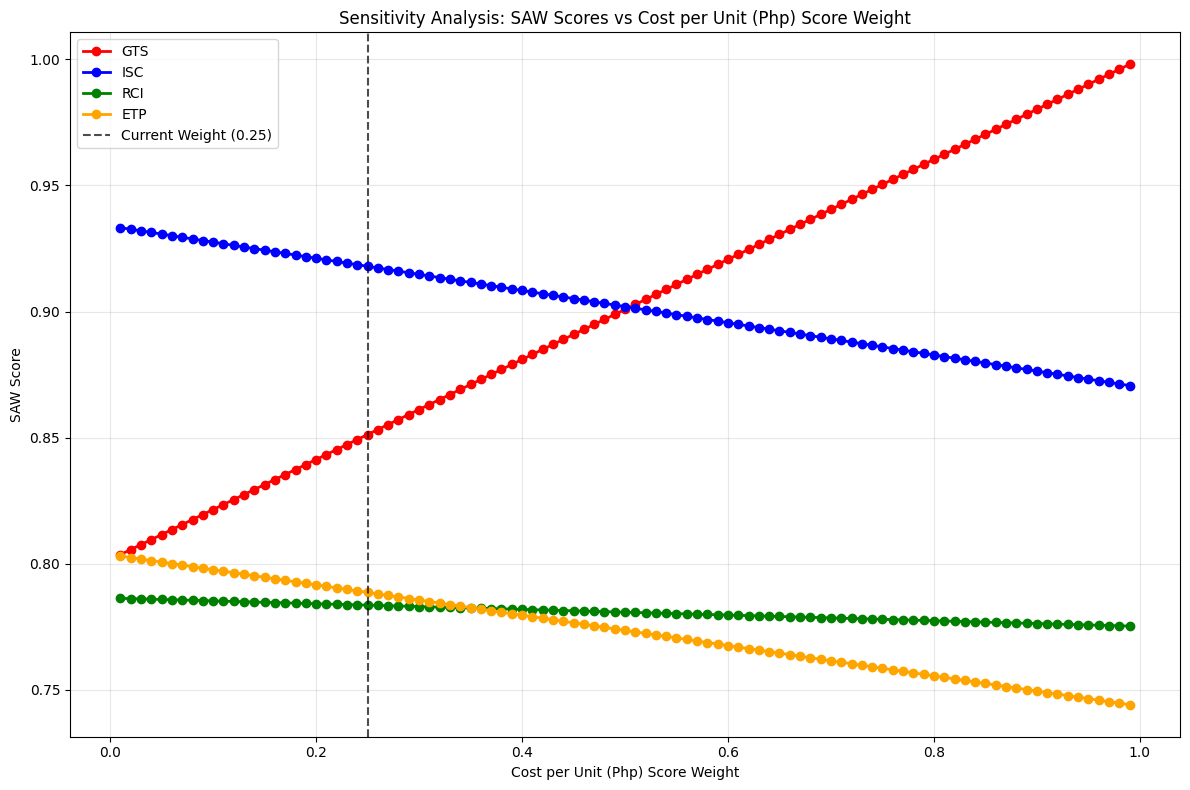


STABILITY ANALYSIS:
Current Performance weight: 0.25
Within ±0.05 range:
Stable winner: ISC


In [111]:
print("SENSITIVITY ANALYSIS: Performance Score Weight")
print("="*50)
print("Testing how changes in Performance weight affect the winner.")

# Display results
winners = {}
for result in sensitivity_results:
    perf_weight = result['Performance Weight']
    winner = result['Winner']
    winning_score = result['Winning Score']
    
    if winner not in winners:
        winners[winner] = []
    winners[winner].append(perf_weight)
    
    print(f"Performance Weight: {perf_weight:.2f} ({perf_weight*100:.0f}%) -> Winner: {winner} (Score: {winning_score:.4f})")

print(f"\nWINNER SUMMARY:")
print("="*30)
for Supplier, weight_ranges in winners.items():
    print(f"{Supplier}: Wins when Performance weight is {min(weight_ranges):.2f}-{max(weight_ranges):.2f}")

# Visualize sensitivity analysis
plt.figure(figsize=(12, 8))

# Plot scores vs performance weight for each Supplier
colors = ['red', 'blue', 'green', 'orange', 'purple']
for i, Supplier in enumerate(df['Supplier']):
    scores = [result['All Scores'][i] for result in sensitivity_results]
    plt.plot(weight_range, scores, marker='o', label=Supplier, color=colors[i], linewidth=2)

plt.axvline(x=weights[column_sensitivity_index], color='black', linestyle='--', 
           label=f'Current Weight ({weights[column_sensitivity_index]:.2f})', alpha=0.7)

plt.xlabel('Cost per Unit (Php) Score Weight')
plt.ylabel('SAW Score')
plt.title('Sensitivity Analysis: SAW Scores vs Cost per Unit (Php) Score Weight')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Check stability around current weight
current_weight = weights[column_sensitivity_index]
tolerance = 0.05
stable_range = [w for w in weight_range if abs(w - current_weight) <= tolerance]
stable_winners = [result['Winner'] for result in sensitivity_results 
                 if result['Performance Weight'] in stable_range]

print(f"\nSTABILITY ANALYSIS:")
print("="*30)
print(f"Current Performance weight: {current_weight:.2f}")
print(f"Within ±{tolerance:.2f} range:")
if len(set(stable_winners)) == 1:
    print(f"Stable winner: {stable_winners[0]}")
else:
    print(f"Winner changes: {set(stable_winners)}")

## SAW Method: Advantages and Disadvantages

### Advantages

1. **Simplicity**: Easy to understand and implement
2. **Intuitive**: Linear aggregation is natural for decision makers
3. **Transparency**: Clear how each criterion contributes to final score
4. **Computational Efficiency**: Fast calculation even for large problems
5. **Flexibility**: Works with both quantitative and qualitative criteria
6. **Wide Applicability**: Suitable for various decision-making contexts

### Disadvantages

1. **Assumption of Additivity**: Assumes criteria are independent (no interactions)
2. **Compensation**: Poor performance in one criterion can be completely offset by good performance in others
3. **Weight Sensitivity**: Results can be sensitive to weight changes
4. **Normalization Dependency**: Different normalization methods can yield different results
5. **No Uncertainty Handling**: Doesn't account for uncertainty in data or preferences
6. **Linear Relationships**: Assumes linear relationships between criteria and utility

### When to Use SAW

**Best for:**
- Simple decision problems with independent criteria
- When compensation between criteria is acceptable
- Situations requiring transparent, explainable decisions
- Problems with well-defined, measurable criteria

**Avoid when:**
- Criteria have complex interactions
- Compensation is not acceptable (e.g., safety-critical decisions)
- High uncertainty in data or preferences
- Non-linear relationships between criteria and utility

## Key Takeaways

1. **Normalization is Critical**: Choose appropriate normalization method for your data
2. **Weight Carefully**: Ensure weights truly reflect importance and sum to 1.0
3. **Check Sensitivity**: Test how weight changes affect results
4. **Validate Results**: Compare with other MCDM methods when possible
5. **Consider Context**: Ensure SAW assumptions fit your decision problem

## Practice Exercise

Load the smartphone dataset and implement the SAW method to evaluate the smartphones.

**Criteria:**
- **Price** (cost criterion): Lower is better
- **Camera Quality** (benefit criterion): Higher score is better (1-10)
- **Battery Capacity** (benefit criterion): mAh, higher is better  
- **Storage** (benefit criterion): GB, higher is better
- **Brand Reputation** (benefit criterion): Rating 1-10, higher is better

**Your Task:**
1. Create the decision matrix
2. Define your own weights based on your preferences
3. Apply the SAW method
4. Interpret the results